Check Performance

In [1]:
from datetime import datetime
from sklearn.metrics import confusion_matrix
import itertools
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Full16FlowRGB_MyKey15_Batch30-CM.txt
stream='FlowRGB'
frame='16'
interval='All'
dset='JHMDB_Full'
#model='_FlowNet_MyKey25R_Batch30'
model='_MyKey25_Batch30'
#fileName=dset+stream+str(frame)+interval+'-CM.txt'
fileName='../JHMDB/'+dset+str(frame)+stream+model+'-CM.txt'
print(fileName)
#KTH-Fullrgb16All-CM.txt

../JHMDB/JHMDB_Full16FlowRGB_MyKey25_Batch30-CM.txt


In [9]:
def plot_to_image(figure):
    """Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call."""
    # Save the plot to a PNG in memory.
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    # Convert PNG buffer to TF image
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    # Add the batch dimension
    image = tf.expand_dims(image, 0)
    return image

def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
    """
    figure = plt.figure(figsize=(101, 101))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)

    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure


def classification_report_csv(report,path):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-4]:#changed from -1 to -4
        
        row = {}
        row_data = line.split('      ')

        if len(row_data) == 1:
            continue
        else:
            row_data = list(filter(None, row_data))
            row['class'] = row_data[0]
            row['precision'] = float(row_data[1])
            row['recall'] = float(row_data[2])
            row['f1_score'] = float(row_data[3])
            row['support'] = float(row_data[4])

            report_data.append(row)

    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv(path, index = False)

[[73.611  0.     4.167  0.     0.     0.     0.     0.     8.333  0.
   0.     0.     0.     6.944  4.167  1.389  1.389  0.     0.     0.
   0.   ]
 [ 0.    28.571  0.     0.    17.143  0.     0.     2.857  0.     0.
   2.857  8.571  2.857  0.     5.714 20.     0.     5.714  2.857  2.857
   0.   ]
 [ 1.613 12.903 75.806  0.     0.     0.     0.     0.     3.226  0.
   0.     0.     0.     0.     0.     1.613  1.613  0.     0.     0.
   3.226]
 [ 0.     0.     0.    57.143  1.786  0.     5.357  5.357  0.    14.286
   1.786  1.786  0.     0.     0.     0.     3.571  0.     3.571  5.357
   0.   ]
 [ 0.     0.     0.     0.    96.774  0.     0.     1.613  0.     1.613
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.   ]
 [ 0.     9.524  0.     9.524  0.    33.333  0.     4.762  0.     2.381
  26.19   2.381  2.381  2.381  0.     0.     7.143  0.     0.     0.
   0.   ]
 [ 0.     0.     0.     2.857  0.    11.429 57.143  0.     0.     0.
   5.714 14.286  2.857  0.  

"print('Classification Report')\n\nfrom sklearn.metrics import classification_report\n\nreport=classification_report(validation_generator.classes, y_pred, target_names=target_names)\n\nprint(report)\npath='graphs/'+str(interval)+'-'+f_rep+'-3DCNN-epoch-'+str(epoch)+'-Val-Report-'+algo+'.csv'\nclassification_report_csv(report,path)"

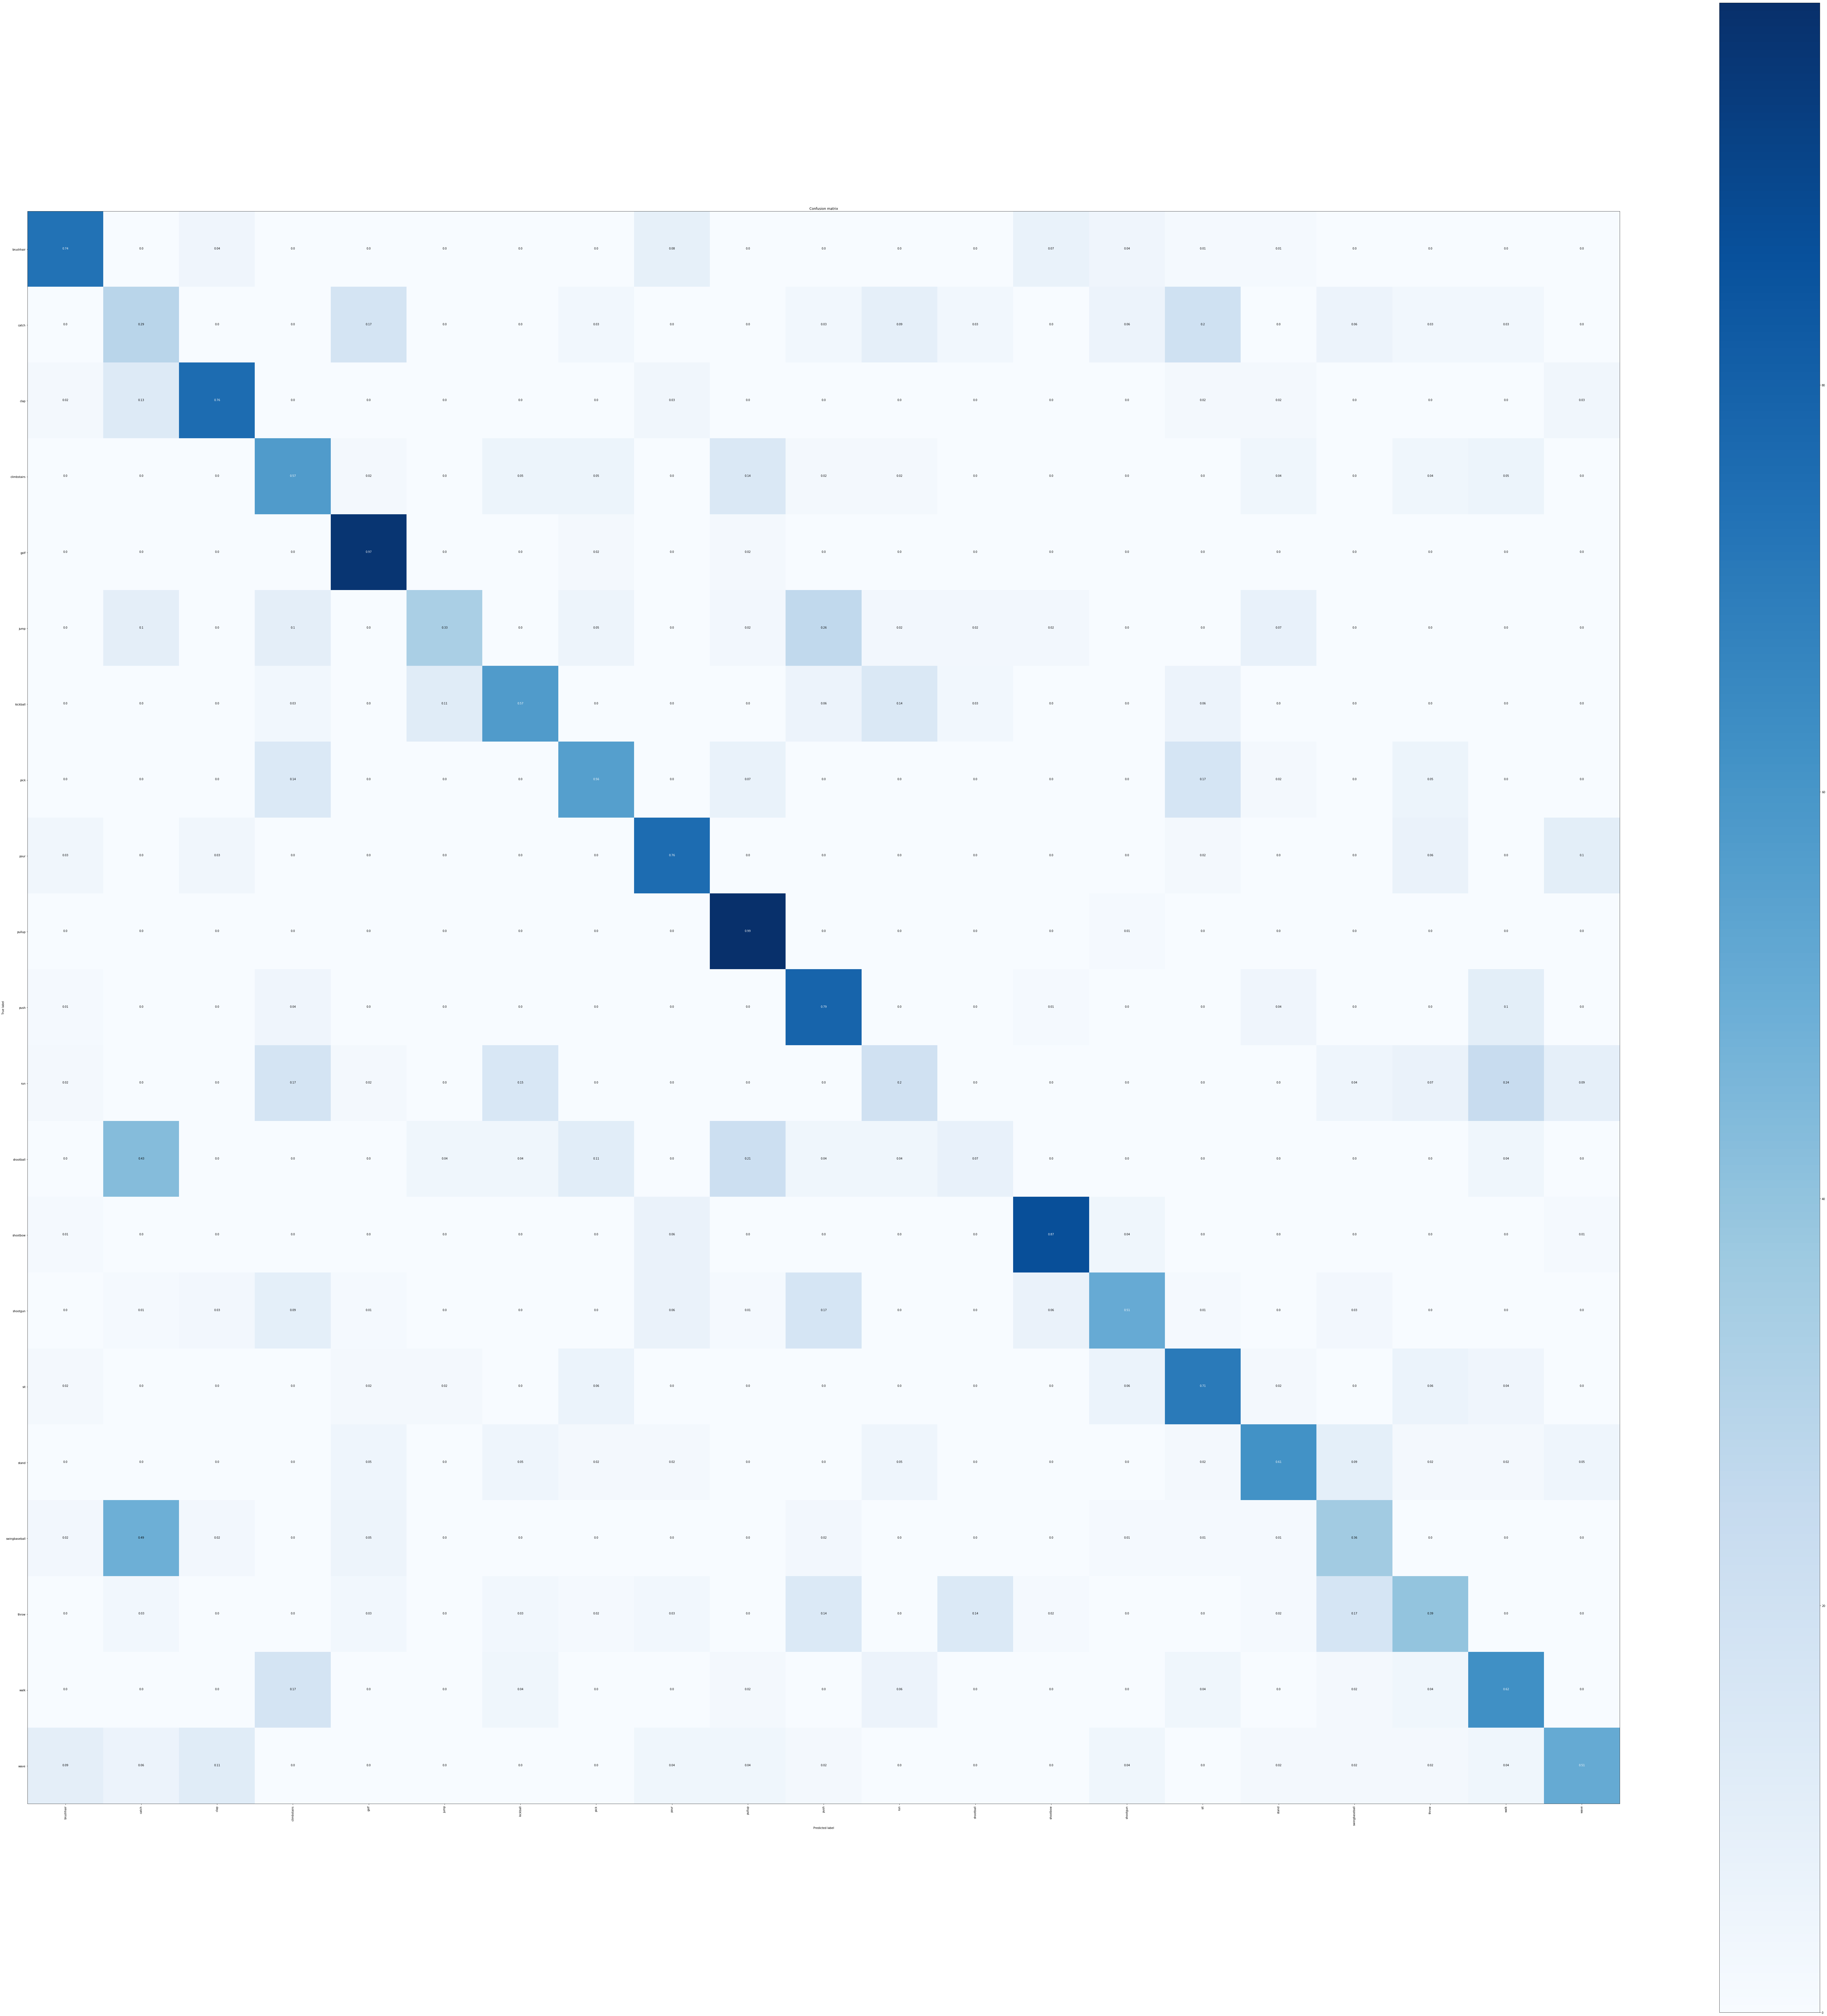

In [10]:
from sklearn.metrics import confusion_matrix

with open(fileName) as file:
    cm = [[float(digit) for digit in line.split()] for line in file]

    
print(np.array(cm))
cm = np.array(cm, dtype=np.float32)
#cm=confusion_matrix(validation_generator.classes, y_pred)


with open('JHMDB_class_names.txt') as f:
    target_names = [line.rstrip() for line in f]


    
figure = plot_confusion_matrix(cm, class_names=target_names)

#figure.savefig(dset+stream+frame+interval+'-CM.jpg')
figure.savefig('../CM_jpg/'+dset+str(frame)+stream+model+'-CM.jpg')

'''print('Classification Report')

from sklearn.metrics import classification_report

report=classification_report(validation_generator.classes, y_pred, target_names=target_names)

print(report)
path='graphs/'+str(interval)+'-'+f_rep+'-3DCNN-epoch-'+str(epoch)+'-Val-Report-'+algo+'.csv'
classification_report_csv(report,path)'''
